In [64]:
import json
import matplotlib.pyplot as plt

job_light_num_of_joins = {
    '1': [f'{i}.sql' for i in range(20, 23)],
    '2': [f'{i}.sql' for i in range(1, 20)] + [f'{i}.sql' for i in range(23, 34)] + [f'{i}.sql' for i in range(51, 53)],
    '3': [f'{i}.sql' for i in range(34, 51)] + [f'{i}.sql' for i in range(53, 56)] + [f'{i}.sql' for i in range(63, 66)],
    '4': [f'{i}.sql' for i in range(56, 63)] + [f'{i}.sql' for i in range(66, 71)],
}

ssb_num_of_joins = {
    '1': [f'{i}.sql' for i in range(1, 6)],
    '3': [f'{i}.sql' for i in range(6, 13)],
    '4': [f'{i}.sql' for i in range(13, 16)]
}


In [80]:
def get_q_error_dict(engine, dataset):
#     for engine in engines:
    card_est_json = f'./eval_results/{engine}_{dataset}.json'
    
    with open(card_est_json, 'r') as f:
        runtimes = json.load(f)
    queries = runtimes.keys()
    print("reading: ", queries)

    q_errors = {}
    q_errors_size_bin = {}
    for n_join in ssb_num_of_joins:
        q_errors[n_join] = []
        for q in ssb_num_of_joins[n_join]:
            if q in queries:
                # print(f"Query {q} found with {n_join} joins")
                q_error = runtimes[q]['q-error']
                sign = -1 if '-' in runtimes[q]['estimation diff'] else 1
                q_errors[n_join].append(sign * (q_error - 1))
                
                order = str(len(str(int(runtimes[q]['actual']))))
                if order not in q_errors_size_bin:
                    q_errors_size_bin[order] = []
                q_errors_size_bin[order].append(sign * (q_error - 1))
                
            else:
                print(f"Query {q} not found in results")
    return q_errors, q_errors_size_bin


def plot_boxes(error_dict, engine, dataset):
    fig1, ax1 = plt.subplots()
    
    box_data = [error_dict[k] for k in error_dict]
    
    
    ax1.boxplot(box_data)
    
    plt.ylim([-10,10])
    ax1.set_title(f'{engine.split("_")[0]} q-error on {dataset} ')
    
    plt.xticks([i for i in range(1, 1+len(error_dict.keys()))], 
                [f'{list(error_dict.keys())[i-1]} ({len(error_dict[list(error_dict.keys())[i-1]])} qs)' for i in range(1, 1+len(error_dict.keys()))], rotation = 20)
    
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(f"Orders of magnitude of true query cardinalities ({dataset})")
    # plt.xlabel(f"# of joins in query ({dataset})")
    plt.ylabel("Q-error")
    plt.show()
    

reading:  dict_keys(['1.sql', '10.sql', '11.sql', '12.sql', '13.sql', '14.sql', '15.sql', '2.sql', '3.sql', '4.sql', '5.sql', '6.sql', '7.sql', '8.sql', '9.sql'])
{'5': [-2637.0625, -2637.0625, -0.15049485736464185, -0.1584042241126431, -0.2725002540761068], '7': [-95.85808232524154, -0.21481610738403267], '4': [-2371.0, -2371.0, -0.19921175206019348, 0.029113651067500523], '6': [-0.13597748137722854, -0.1515635279774945, 0.027411689254906557], '2': [-0.35897435897435903]}


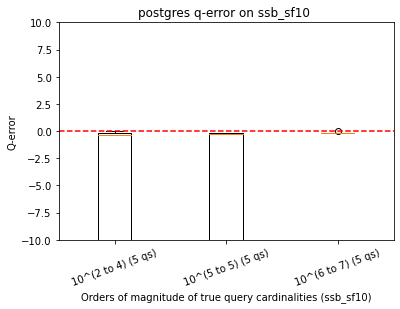

reading:  dict_keys(['1.sql', '10.sql', '11.sql', '12.sql', '13.sql', '14.sql', '15.sql', '2.sql', '3.sql', '4.sql', '5.sql', '6.sql', '7.sql', '8.sql', '9.sql'])
{'5': [0.899073657276884, 0.899073657276884, -0.3855277380152493, 0.20283616105343127, 3.1191155329393245], '7': [0.42761825011043575, 3.1780942718333627], '4': [4.046585160202361, 4.046585160202361, 1.1311622348371677, 5.9152469268923875], '6': [0.35224355055630263, 4.550735440168569, 5.956427561192116], '2': [0.8867924528301887]}


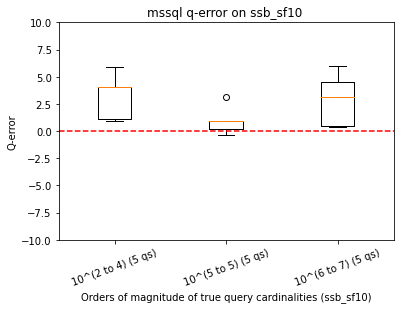

reading:  dict_keys(['1.sql', '2.sql', '3.sql', '4.sql', '5.sql', '6.sql', '7.sql', '8.sql', '9.sql', '10.sql', '11.sql', '12.sql', '13.sql', '14.sql', '15.sql'])
{'5': [-0.1966037307932189, -0.1966037307932189, -0.18445632086309383, -0.21134969325153374, -0.19597729381583973], '7': [-0.20116894885219483, -0.19768730741172247], '4': [-0.19315895372233394, -0.19315895372233394, -0.23688100517368804, -0.1981912144702842], '6': [-0.1997037044280543, -0.19490373545816353, -0.194610611341969], '2': [-0.39473684210526305]}


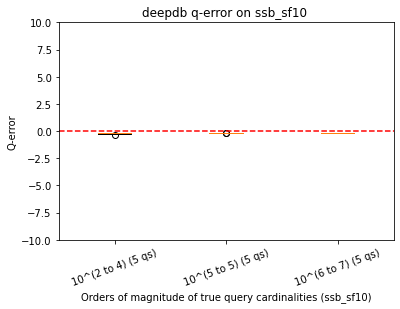

FileNotFoundError: [Errno 2] No such file or directory: './eval_results/neurocard_ssb_sf10.json'

In [83]:
for e in ['postgres', 'mssql', 'deepdb', 'neurocard']:
    for d in ['ssb_sf10']:
        err_dict_joins, err_dict_sizes = get_q_error_dict(engine=e, dataset=d)
        print(err_dict_sizes)
        
        # err_dict_sizes={
        #     '10^(1 to 3)':  err_dict_sizes['1'] + err_dict_sizes['2'] + err_dict_sizes['3'],
        #     '10^(4 to 5)':  err_dict_sizes['4'] + err_dict_sizes['5'],
        #     '10^(6 to 7)':  err_dict_sizes['6'] + err_dict_sizes['7'],
        #     '10^(8 to 10)':  err_dict_sizes['8'] + err_dict_sizes['9']+ err_dict_sizes['10'],
        # }
        
        err_dict_sizes={
            '10^(2 to 4)':  err_dict_sizes['2'] + err_dict_sizes['4'],
            '10^(5 to 5)':  err_dict_sizes['5'],
            '10^(6 to 7)':  err_dict_sizes['6'] + err_dict_sizes['7'],
        }
        plot_boxes(err_dict_sizes, engine=e, dataset=d)
        
        # plot_boxes(err_dict_joins, engine=e, dataset=d)

# err_dict_joins, err_dict_sizes = get_q_error_dict(engine='postgres', dataset='job-light')
# plot_boxes(err_dict_joins, engine='postgres', dataset='job-light')

# plt_q_error_box('mssql')
# plt_q_error_box('deepdb_budget_0')
# # plt_q_error_box('deepdb_budget_5')
# # plt_q_error_box('deepdb_budget_10')
# plt_q_error_box('neurocard')

In [82]:
err_dict_sizes

{'3': [-13.591836734693878],
 '1': [-8.0],
 '2': [-4.875, -15.0],
 '6': [-2.433696230034903, -1.5582654930064566, -0.3801751959428308],
 '8': [-4.871361630493102, -1.869733311952976, -1.3385973205803117],
 '9': [-7.50947902570932],
 '7': [-2.5344939467059606, -1.0100280349570592, -0.5662936946126769],
 '4': [-1.1857142857142855]}

In [27]:
deepdb_dir = '../baseline/deepdb-public/result_reproduction/'
deepdb_json_file = './eval_results/deepdb_budget_10_card_est_eval.json'
csv_file = 'deepdb_job_light_budget_10.csv'

In [28]:
import pandas as pd
import json
df = pd.read_csv(deepdb_dir + csv_file)

In [29]:
card_est_dict = {}
for i in range(70):
    actual_card = int(df['cardinality_true'].iloc[i])
    est_card = float(df['cardinality_predict'].iloc[i])
    
    card_est_dict[f'{i+1}.sql'] = {
        'actual': actual_card,
        'estimated': est_card,
        "estimation diff": '{0:+}'.format(est_card - actual_card),
        'q-error': max(actual_card / est_card, est_card / actual_card),        
    }
    
with open(deepdb_json_file, "w") as outfile:
    json.dump(card_est_dict, outfile, indent=4)

In [32]:
neurocard_dir = '../baseline/neurocard/neurocard/result_reproduction/'
txt_file = 'neurocard_job_light.txt'

neurocard_json_file = './eval_results/neurocard_card_est_eval.json'

In [35]:
import os
card_est_dict = {}
with open(os.path.join(neurocard_dir, txt_file), 'r') as f:
    q_cnt = 0
    line = f.readline()
    while line:
        if 'actual' in line:
            actual_card = int(line.split('actual ')[-1].split(' (')[0])
        if 'err=' in line:
            est_card = int(line.split('fact_psample_8000 ')[-1].split(' (err=')[0])
            card_est_dict[f'{q_cnt+1}.sql'] = {
                'actual': actual_card,
                'estimated': est_card,
                "estimation diff": '{0:+}'.format(est_card - actual_card),
                'q-error': max(actual_card / est_card, est_card / actual_card),        
            }
            q_cnt += 1
            actual_card = None
            est_card = None
        line = f.readline()
        
with open(neurocard_json_file, "w") as outfile:
    json.dump(card_est_dict, outfile, indent=4)

In [34]:
card_est_dict

{'1.sql': {'actual': 715,
  'estimated': 3463,
  'estimation diff': '+2748',
  'q-error': 4.8433566433566435},
 '2.sql': {'actual': 9,
  'estimated': 3,
  'estimation diff': '-6',
  'q-error': 3.0},
 '3.sql': {'actual': 47,
  'estimated': 235,
  'estimation diff': '+188',
  'q-error': 5.0},
 '4.sql': {'actual': 16,
  'estimated': 10,
  'estimation diff': '-6',
  'q-error': 1.6},
 '5.sql': {'actual': 148552,
  'estimated': 5625,
  'estimation diff': '-142927',
  'q-error': 26.409244444444443},
 '6.sql': {'actual': 62682311,
  'estimated': 46335369,
  'estimation diff': '-16346942',
  'q-error': 1.3527961976519491},
 '7.sql': {'actual': 11990578,
  'estimated': 10885095,
  'estimation diff': '-1105483',
  'q-error': 1.1015593341169738},
 '8.sql': {'actual': 157041640,
  'estimated': 130850413,
  'estimation diff': '-26191227',
  'q-error': 1.200161592153324},
 '9.sql': {'actual': 850677,
  'estimated': 179246,
  'estimation diff': '-671431',
  'q-error': 4.745863227073407},
 '10.sql': {'

In [43]:
for i in job_light_num_of_joins:
    print(len(job_light_num_of_joins[i]))

3
32
23
12
